![](CintillaTecNM-ITD.png)

# Simulación

## Unidad 3. Variables Aleatorias 

### Facilitador: José Gabriel Rodríguez Rivas

<div style="color: blue;">
<h2> Practica 4-2: Simular el número de llegadas de clientes a un cajero automático durante una hora
</div>

### Contexto del problema:
Supongamos que estamos modelando el número de llegadas de clientes a un cajero automático durante una hora. Basado en observaciones previas, se sabe que, en promedio, llegan 5 clientes por hora. Queremos generar variables aleatorias que representen el número de clientes que llegan en una hora, utilizando la distribución de Poisson y el método de la transformada inversa.

###  Distribución Poisson:
La distribución de Poisson modela el número de eventos (en este caso, llegadas de clientes) que ocurren en un intervalo de tiempo fijo, bajo la suposición de que los eventos ocurren con una tasa constante y de manera independiente.

λ: es la tasa promedio de eventos por unidad de tiempo, en este caso,   **λ=5 (5 clientes por hora).**

La función de probabilidad de la distribución Poisson es:
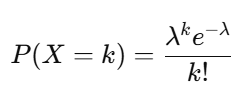

donde:

- 𝑋 es el número de clientes que llegan en una hora.
- 𝑘 es el número de eventos (llegadas) que estamos modelando.
- λ es la tasa de llegadas promedio.

###  Método de la Transformada Inversa:
El método de la transformada inversa nos permite generar números aleatorios que siguen una distribución específica (en este caso, Poisson) a partir de números aleatorios uniformes 𝑈 ∼ 𝑈𝑛𝑖𝑓𝑜𝑟𝑚 (0,1).

### Pasos para aplicar la transformada inversa con la distribución Poisson:
1- **Generar un número aleatorio uniforme 𝑈:** Se genera un número aleatorio 𝑈 entre 0 y 1.

2- **Función de distribución acumulada (FDA):** Calculamos la función de distribución acumulada (FDA) de la distribución Poisson, que es la suma de las probabilidades acumuladas $F(k) >= U$

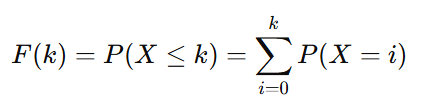

3- **Aplicar la transformada inversa:** Para el número aleatorio uniforme 𝑈, encontramos el valor más pequeño de 
𝑘 tal que  F(k)≥U.  
Este 𝑘 es el número de clientes que llegaron al cajero automático durante una hora.

**Programa en Python que aplica el método de la transformada inversa para generar variables aleatorias que modelan el número de clientes que llegan al cajero automático en una hora, utilizando la distribución Poisson.**

Número de clientes que llegaron en cada simulación (hora):
[4, 8, 1, 6, 6, 6, 1, 4, 7, 4, 4, 4, 2, 4, 4, 4, 4, 4, 8, 1, 3, 8, 8, 4, 6, 7, 4, 3, 5, 7, 3, 3, 8, 9, 4, 3, 10, 4, 4, 6, 7, 5, 5, 8, 2, 4, 6, 4, 7, 7, 7, 5, 1, 6, 3, 7, 8, 10, 3, 5, 5, 2, 5, 6, 4, 4, 4, 3, 4, 4, 3, 4, 6, 7, 6, 5, 1, 4, 3, 3, 5, 3, 6, 4, 4, 6, 10, 10, 7, 6, 7, 8, 5, 4, 3, 9, 6, 4, 2, 3]


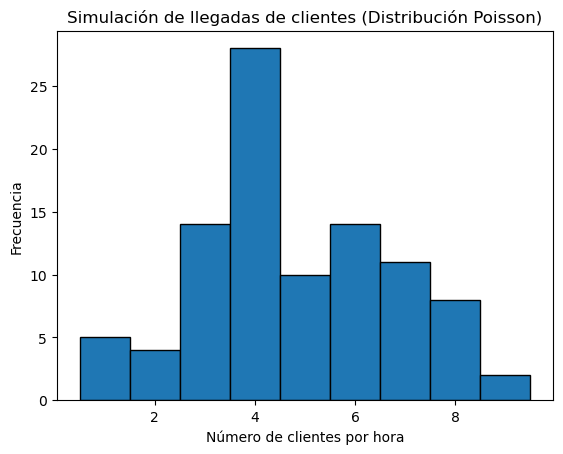

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Parámetro de la distribución Poisson
lambda_poisson = 5  # Tasa promedio de llegadas por hora

# Generar un número aleatorio uniforme U ~ Uniform(0, 1)
num_simulaciones = 100  # Número de simulaciones (horas)
U = np.random.uniform(0, 1, num_simulaciones)

# Función de probabilidad de la distribución Poisson
def poisson_pmf(lambda_poisson, k):
    return (lambda_poisson ** k) * math.exp(-lambda_poisson) / math.factorial(k)

# Función para generar números aleatorios usando la transformada inversa para la Poisson
def poisson_inverse_transform(lambda_poisson, U):
    F_k = 0  # Inicializamos la FDA
    k = 0
    while True:
        F_k += poisson_pmf(lambda_poisson, k)  # Sumamos la probabilidad hasta que F(k) >= U
        if U <= F_k:
            return k  # Este valor de k es el número de llegadas
        k += 1

# Generar la cantidad de clientes que llegan en cada simulación (hora)
llegadas_simuladas = [poisson_inverse_transform(lambda_poisson, u) for u in U]

# Mostrar resultados
print("Número de clientes que llegaron en cada simulación (hora):")
print(llegadas_simuladas)

# Graficar los resultados
plt.hist(llegadas_simuladas, bins=np.arange(min(llegadas_simuladas), max(llegadas_simuladas) + 1) - 0.5, edgecolor='black')
plt.title("Simulación de llegadas de clientes (Distribución Poisson)")
plt.xlabel("Número de clientes por hora")
plt.ylabel("Frecuencia")
plt.show()
